### Exploratory data analysis of penguims lter data 

#### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msg

#### Read the penguins lter 

In [4]:
data = pd.read_csv("./penguins_lter.csv")

In [5]:
data.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11-11-2007,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11-11-2007,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


#### Basic information about the Dataset

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Region               344 non-null    object 
 4   Island               344 non-null    object 
 5   Stage                344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Clutch Completion    344 non-null    object 
 8   Date Egg             344 non-null    object 
 9   Culmen Length (mm)   342 non-null    float64
 10  Culmen Depth (mm)    342 non-null    float64
 11  Flipper Length (mm)  342 non-null    float64
 12  Body Mass (g)        342 non-null    float64
 13  Sex                  334 non-null    object 
 14  Delta 15 N (o/oo)    330 non-null    float64
 15  Delta 13 C (o/oo)    331 non-null    flo

### Univariate analysis

##### studyName

In [5]:
data['studyName'].nunique()

3

##### Sample Number	

In [6]:
data['Sample Number'].nunique()

152

#### Species

In [7]:
data['Species']

0      Adelie Penguin (Pygoscelis adeliae)
1      Adelie Penguin (Pygoscelis adeliae)
2      Adelie Penguin (Pygoscelis adeliae)
3      Adelie Penguin (Pygoscelis adeliae)
4      Adelie Penguin (Pygoscelis adeliae)
                      ...                 
339      Gentoo penguin (Pygoscelis papua)
340      Gentoo penguin (Pygoscelis papua)
341      Gentoo penguin (Pygoscelis papua)
342      Gentoo penguin (Pygoscelis papua)
343      Gentoo penguin (Pygoscelis papua)
Name: Species, Length: 344, dtype: object

##### Region

In [8]:
data['Region']

0      Anvers
1      Anvers
2      Anvers
3      Anvers
4      Anvers
        ...  
339    Anvers
340    Anvers
341    Anvers
342    Anvers
343    Anvers
Name: Region, Length: 344, dtype: object

##### Island

In [9]:
data['Island']

0      Torgersen
1      Torgersen
2      Torgersen
3      Torgersen
4      Torgersen
         ...    
339       Biscoe
340       Biscoe
341       Biscoe
342       Biscoe
343       Biscoe
Name: Island, Length: 344, dtype: object

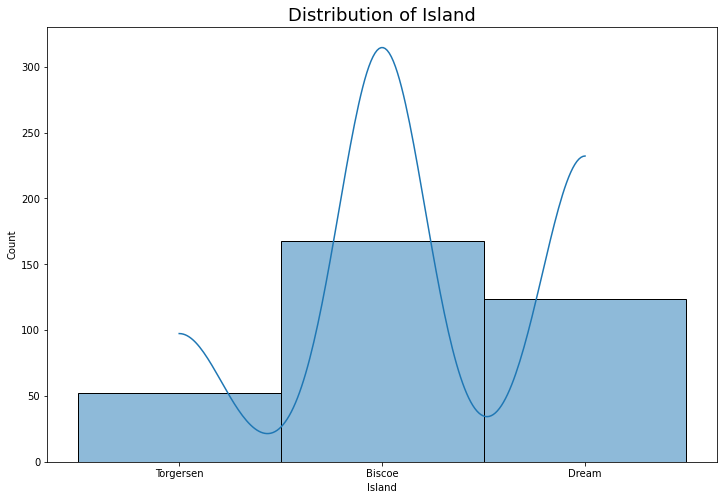

In [10]:
plt.figure(figsize=(12,8))
sns.histplot(data=data, x=data['Island'], kde=True)
plt.title("Distribution of Island", fontsize=18)
plt.show()

##### Stage

In [11]:
data['Stage'].nunique()

1

##### Individual ID

In [13]:
data['Individual ID'].nunique()

190

##### Clutch Completion

In [14]:
data['Clutch Completion'].nunique()

2

##### Date Egg

In [16]:
data['Date Egg']

0      11-11-2007
1      11-11-2007
2        11/16/07
3        11/16/07
4        11/16/07
          ...    
339    12-01-2009
340      11/22/09
341      11/22/09
342      11/22/09
343      11/22/09
Name: Date Egg, Length: 344, dtype: object

In [17]:
pd.DatetimeIndex(data['Date Egg'])

DatetimeIndex(['2007-11-11', '2007-11-11', '2007-11-16', '2007-11-16',
               '2007-11-16', '2007-11-16', '2007-11-15', '2007-11-15',
               '2007-11-09', '2007-11-09',
               ...
               '2009-11-25', '2009-11-25', '2009-12-01', '2009-12-01',
               '2009-12-01', '2009-12-01', '2009-11-22', '2009-11-22',
               '2009-11-22', '2009-11-22'],
              dtype='datetime64[ns]', name='Date Egg', length=344, freq=None)

In [19]:
data['Date Egg'] = pd.DatetimeIndex(data['Date Egg'])
data['year'] = pd.DatetimeIndex(data['Date Egg']).year
data['month'] = pd.DatetimeIndex(data['Date Egg']).month

In [20]:
data[['Date Egg','year','month']]

,Date Egg,year,month
0,2007-11-11,2007,11
1,2007-11-11,2007,11
2,2007-11-16,2007,11
3,2007-11-16,2007,11
4,2007-11-16,2007,11
...,...,...,...
339,2009-12-01,2009,12
340,2009-11-22,2009,11
341,2009-11-22,2009,11
342,2009-11-22,2009,11


In [21]:
data.dtypes

studyName                      object
Sample Number                   int64
Species                        object
Region                         object
Island                         object
Stage                          object
Individual ID                  object
Clutch Completion              object
Date Egg               datetime64[ns]
Culmen Length (mm)            float64
Culmen Depth (mm)             float64
Flipper Length (mm)           float64
Body Mass (g)                 float64
Sex                            object
Delta 15 N (o/oo)             float64
Delta 13 C (o/oo)             float64
Comments                       object
year                            int64
month                           int64
dtype: object

#### Culmen Length (mm)

In [22]:
data['Culmen Length (mm)']

0      39.1
1      39.5
2      40.3
3       NaN
4      36.7
       ... 
339     NaN
340    46.8
341    50.4
342    45.2
343    49.9
Name: Culmen Length (mm), Length: 344, dtype: float64

In [23]:
data['Culmen Length (mm)'].min() , data['Culmen Length (mm)'].max()

(32.1, 59.6)

In [24]:
data['Culmen Length (mm)'].mean()

43.92192982456142

In [25]:
data['Culmen Length (mm)'].median()

44.45

In [26]:
data['Culmen Length (mm)'].std()

5.459583713926532

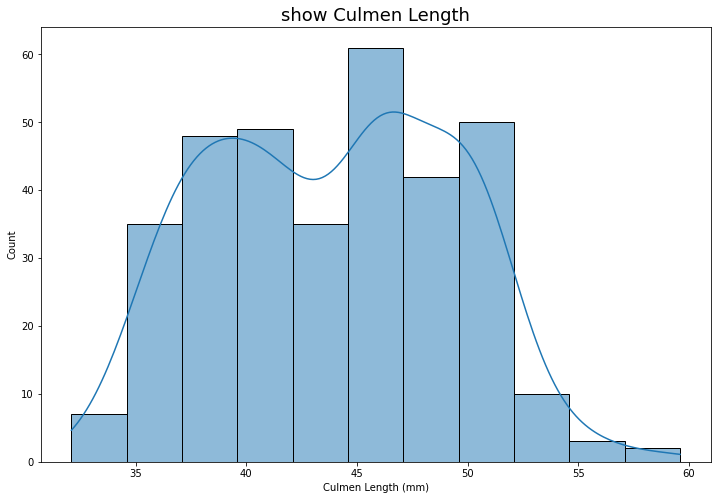

In [27]:
plt.figure(figsize=(12,8))
sns.histplot(data=data, x = data['Culmen Length (mm)'], kde=True)
plt.title("show Culmen Length", fontsize = 18)
plt.show()

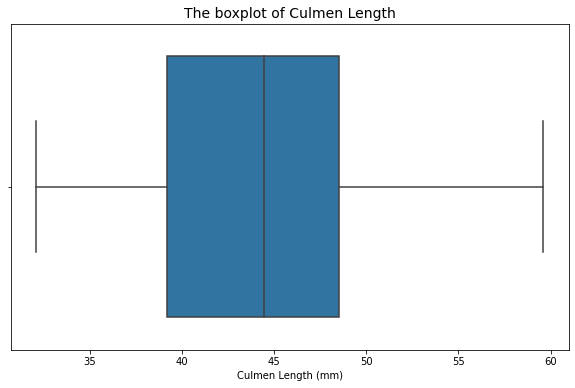

In [28]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data, x='Culmen Length (mm)')
plt.title("The boxplot of Culmen Length", fontsize=14)
plt.show()

#### Culmen Depth (mm)

In [32]:
data['Culmen Depth (mm)']

0      18.7
1      17.4
2      18.0
3       NaN
4      19.3
       ... 
339     NaN
340    14.3
341    15.7
342    14.8
343    16.1
Name: Culmen Depth (mm), Length: 344, dtype: float64

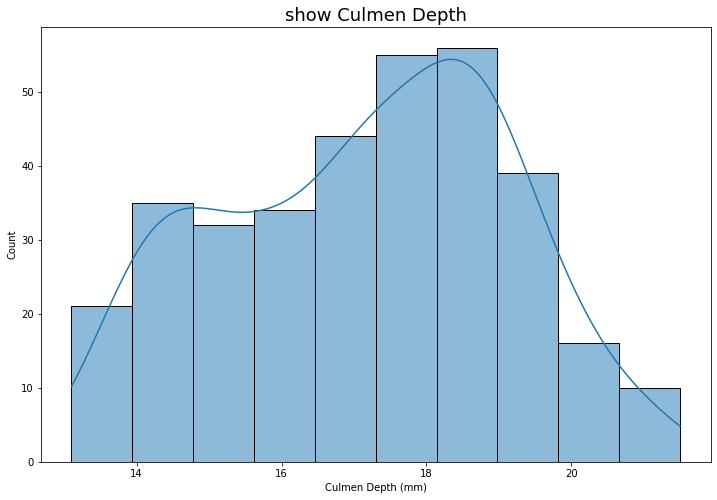

In [33]:
plt.figure(figsize=(12,8))
sns.histplot(data=data, x = data['Culmen Depth (mm)'], kde=True)
plt.title("show Culmen Depth", fontsize = 18)
plt.show()

#### Flipper Length 

In [34]:
data['Flipper Length (mm)']

0      181.0
1      186.0
2      195.0
3        NaN
4      193.0
       ...  
339      NaN
340    215.0
341    222.0
342    212.0
343    213.0
Name: Flipper Length (mm), Length: 344, dtype: float64

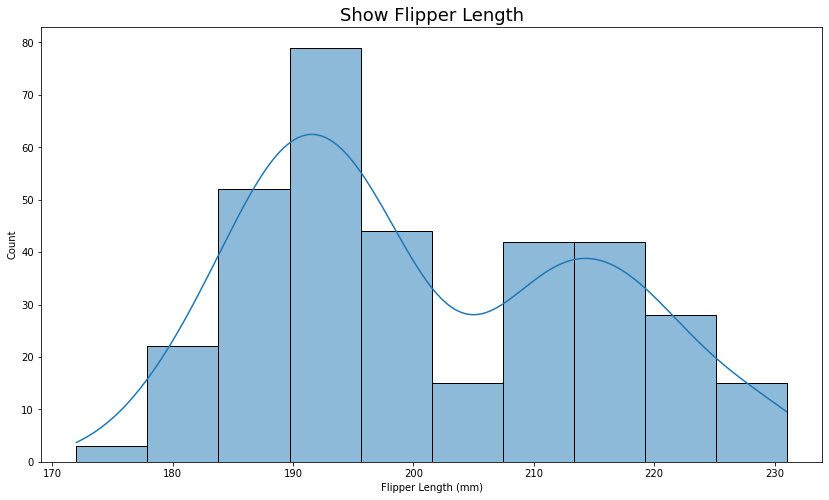

In [36]:
plt.figure(figsize=(14,8))
sns.histplot(data = data, x ='Flipper Length (mm)', kde = True)
plt.title("Show Flipper Length", fontsize = 18)
plt.show()

In [37]:
data['Flipper Length (mm)'].mean()

200.91520467836258

In [38]:
data['Flipper Length (mm)'].median()

197.0

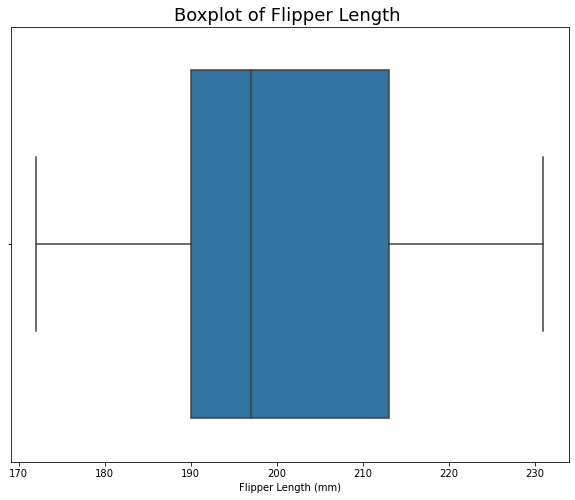

In [39]:
plt.figure(figsize=(10,8))
sns.boxplot(data=data, x='Flipper Length (mm)')
plt.title("Boxplot of Flipper Length ", fontsize=18)
plt.show()

In [45]:
data['Flipper Length (mm)'].max(), data['Flipper Length (mm)'].min()

(231.0, 172.0)

#### Body Mass 

In [6]:
data['Body Mass (g)'].unique()

array([3750., 3800., 3250.,   nan, 3450., 3650., 3625., 4675., 3475.,
       4250., 3300., 3700., 3200., 4400., 4500., 3325., 4200., 3400.,
       3600., 3950., 3550., 3150., 3900., 4150., 4650., 3100., 3000.,
       4600., 3425., 2975., 3500., 4300., 4050., 2900., 2850., 3350.,
       4100., 3050., 4450., 4000., 4700., 4350., 3725., 4725., 3075.,
       2925., 3175., 4775., 3825., 4275., 4075., 3775., 3875., 3275.,
       4475., 3975., 3525., 3575., 4550., 3850., 4800., 2700., 3675.,
       5700., 5400., 5200., 5150., 5550., 5850., 6300., 5350., 5000.,
       5050., 5100., 5650., 5250., 6050., 4950., 4750., 4900., 5300.,
       4850., 5800., 6000., 5950., 4625., 5450., 5600., 4875., 4925.,
       4975., 5500., 4575., 4375., 5750.])

In [7]:
data['Body Mass (g)'].value_counts()

3800.0    12
3700.0    11
3900.0    10
3950.0    10
3550.0     9
          ..
4475.0     1
3975.0     1
3575.0     1
3850.0     1
5750.0     1
Name: Body Mass (g), Length: 94, dtype: int64

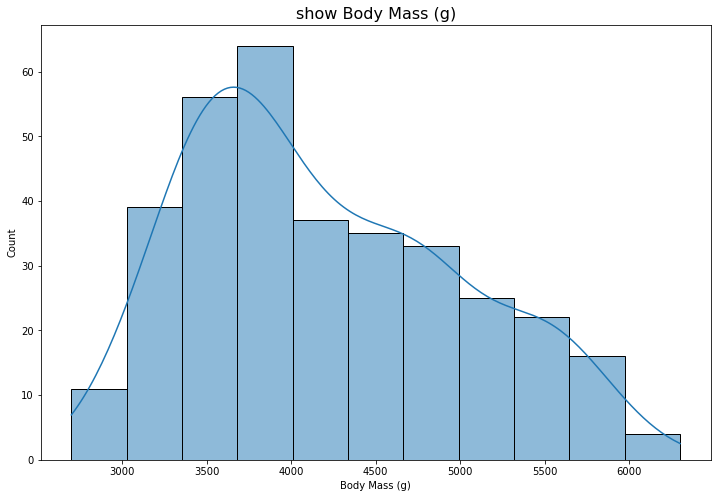

In [10]:
plt.figure(figsize=(12,8))
sns.histplot(data=data, x=data['Body Mass (g)'], kde=True)
plt.title("show Body Mass (g)", fontsize=16)
plt.show()

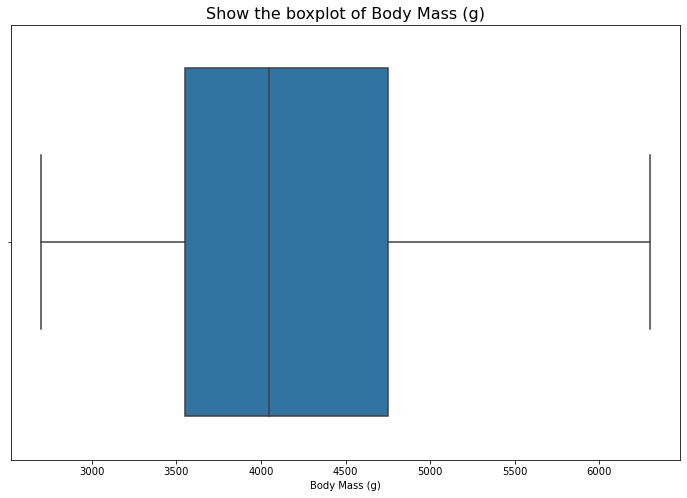

In [11]:
plt.figure(figsize=(12,8))
sns.boxplot(data = data, x='Body Mass (g)')
plt.title("Show the boxplot of Body Mass (g)", fontsize=16)
plt.show()

In [12]:
data.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11-11-2007,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11-11-2007,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


#### Sex

In [13]:
data['Sex'].unique()

array(['MALE', 'FEMALE', nan, '.'], dtype=object)

In [14]:
data['Sex'].value_counts()

MALE      168
FEMALE    165
.           1
Name: Sex, dtype: int64

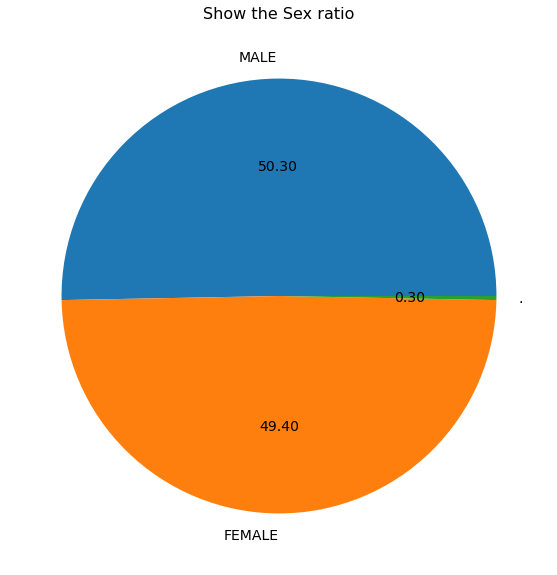

In [15]:
plt.figure(figsize=(10,10))
wedges, labels, pcts = plt.pie(x = data['Sex'].value_counts().values, labels = data['Sex'].value_counts().index, autopct="%.2f")
for l in labels:
    l.set_fontsize(14)
for p in pcts:
    p.set_fontsize(14)
plt.title("Show the Sex ratio", fontsize=16)
plt.show()

#### Delta 15 N (o/oo)

In [17]:
data['Delta 15 N (o/oo)'].value_counts()

8.94956    1
7.84057    1
7.63884    1
8.07137    1
7.79958    1
          ..
9.04296    1
9.32277    1
8.96436    1
9.49645    1
8.36390    1
Name: Delta 15 N (o/oo), Length: 330, dtype: int64

##### Delta 13 C (o/oo)	

In [18]:
data['Delta 13 C (o/oo)'].value_counts()

-24.69454    1
-25.37899    1
-25.52627    1
-25.52473    1
-25.62618    1
            ..
-26.19444    1
-26.09989    1
-23.90309    1
-26.36678    1
-26.15531    1
Name: Delta 13 C (o/oo), Length: 331, dtype: int64

#### Comments

In [19]:
data['Comments'].value_counts()

Nest never observed with full clutch.                                   13
Not enough blood for isotopes.                                           6
No blood sample obtained.                                                2
No blood sample obtained for sexing.                                     2
Adult not sampled.                                                       1
Nest never observed with full clutch. Not enough blood for isotopes.     1
Sexing primers did not amplify. Not enough blood for isotopes.           1
Name: Comments, dtype: int64

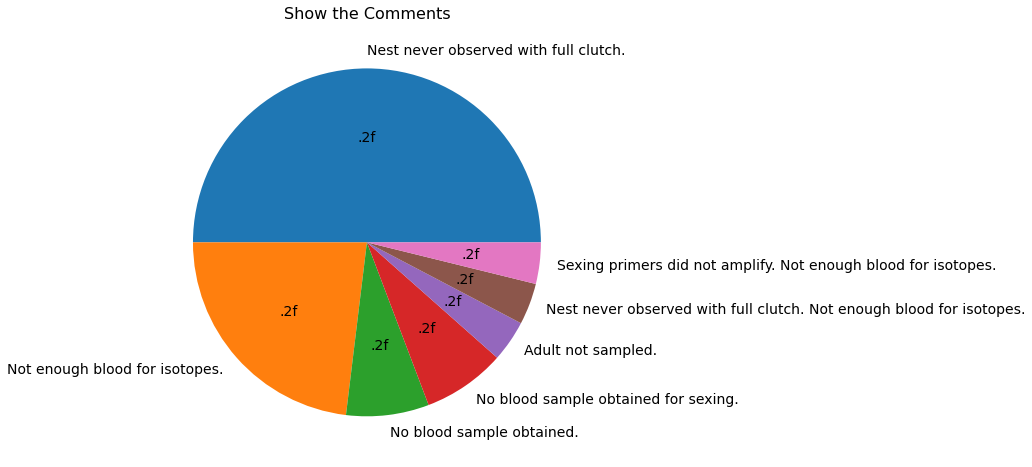

In [20]:
plt.figure(figsize=(8,8))
wedges, labels, pcts = plt.pie(x = data['Comments'].value_counts().values, labels = data['Comments'].value_counts().index, autopct=".2f")
for l in labels:
    l.set_fontsize(14)
for p in pcts:
    p.set_fontsize(14)
plt.title("Show the Comments", fontsize = 16)
plt.show()

### Bivariate Analysis

In [6]:
data.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11-11-2007,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11-11-2007,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


#### Delta 15 N  vs Delta 13 C 

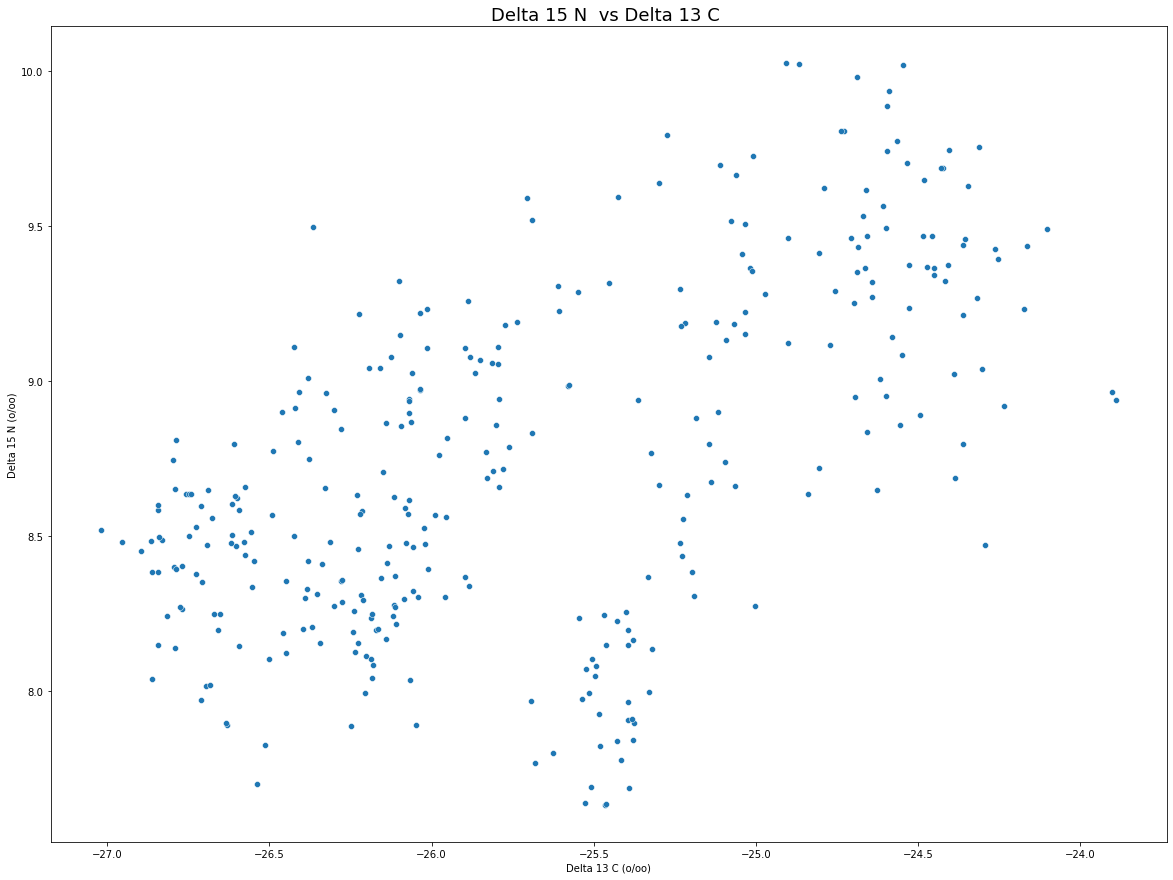

In [8]:
plt.figure(figsize=(20,15))
sns.scatterplot(x='Flipper Length (mm)', y = 'Delta 15 N (o/oo)', data=data)
plt.title("Delta 15 N  vs Delta 13 C ", fontsize=18)
plt.show()

#### Flipper Length (mm) vs Body Mass (g)	

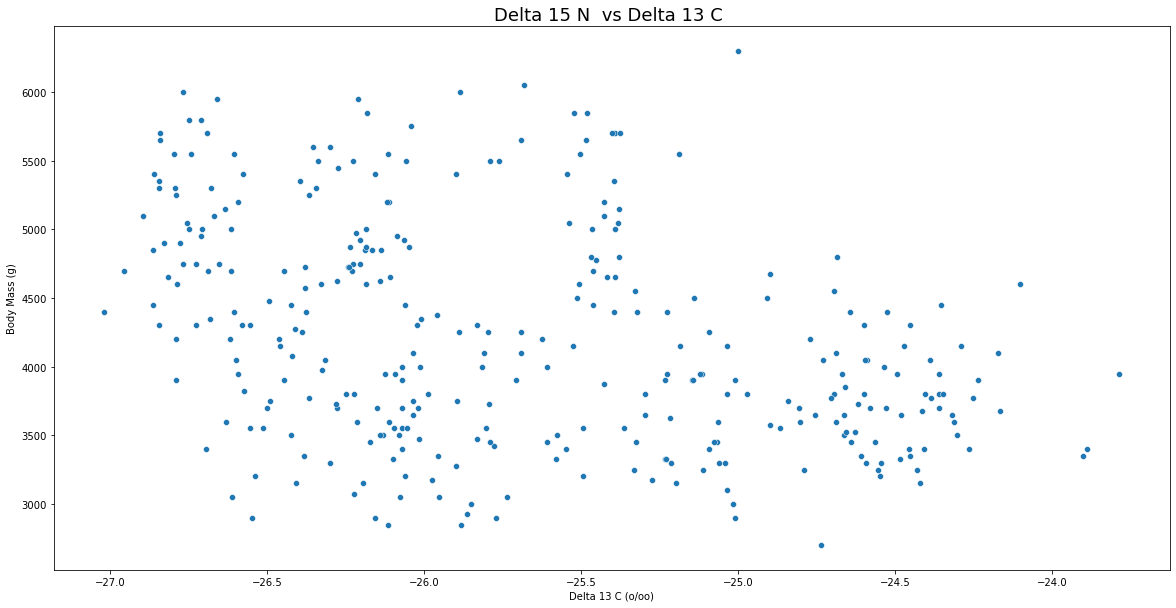

In [9]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='Delta 13 C (o/oo)', y = 'Body Mass (g)', data=data)
plt.title("Delta 15 N  vs Delta 13 C ", fontsize=18)
plt.show()